# <center> 2D PCA Tutorial </center>
<center> Train 2D generative pca nuclear and cell shape model using the Murphy Lab 2D HeLa dataset. </center>
 
## Input
* a directory of raw or synthetic nucleus images
* a directory of raw or synthetic cell shape images
* the resolution of the images (all images should have the same resolution)

## Output
* a valid SLML model file
* an image synthesized from the newly trained model
* a shape space plot generated from the newly trained model


## Model Training

In [2]:
from cellorganizer.tools import img2slml
from IPython.display import Markdown
import glob
import urllib.request
import tarfile 
import os
options = {}
        
# the following list of parameters are adapted to the LAMP2 image
# collection, modify these according to your needs
directory = '/home/murphylab/cellorganizer/local/images/HeLa/2D/LAM/'
dnaImagesDirectoryPath = glob.glob(directory+'orgdna/cell*.tif' )
cellImagesDirectoryPath = glob.glob(directory +'orgcell/cell*.tif' )
proteinImagesDirectoryPath = []
options['masks'] = glob.glob(directory + 'crop/cell*.tif' )  


##Set filename
filename   = 'mmbios_pca'
model_name = filename + '.mat'
# set nuclei and cell model name
options['nucleus.name'] = 'LAMP2'
options['cell.model'] = 'LAMP2'

## Options block
options['verbose'] = True
options['debug'] = False
options['display'] = False
options['model.name']= 'demo2D05'
options['nucleus.class'] = 'framework'
options['nucleus.type'] = 'pca'
options['cell.class'] = 'framework'
options['cell.type'] = 'pca'
#latent dimension for the model
options['model.pca.latent_dim'] = 15

                           
options['model.resolution'] = [ 0.049, 0.049 ]
options['model.filename'] = filename + '.xml'
options['model.id'] = 'lamp2'
options['model.name'] = 'lamp2'

# set the dimensionality of the model
dimensionality = '2D'
# documentation
options['documentation.description'] = 'This model has been trained during MMBIOS 2019'
# set model type
options['train.flag'] = 'framework'



## Function call to train the model
img2slml(dimensionality, dnaImagesDirectoryPath, cellImagesDirectoryPath, proteinImagesDirectoryPath, options)
if (os.path.exists(model_name)):
    display(Markdown("## <center> Training Done </center>"))
    

## <center> Training Done </center>

## Exploration
Exploring preprocessed images

In [1]:
import matplotlib.pyplot as plt
from cellorganizer.tools import __mat2python
import ipywidgets as widgets
from IPython.core.display import display, HTML

%matplotlib inline
def param_show(img):
    dpi  = 80
    try:
        height, width, depth = img.shape
    except:
        height, width = img.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = (width / float(dpi)), (height / float(dpi))
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    # Hide spines, ticks, etc.
    ax.axis('off')
    ax.imshow(img, cmap=plt.cm.binary)
    plt.show()

param_iter = {}
for i in range(5):
    param = __mat2python('param/param' + str(i*8+1) + '/seg.mat')
    out1 = widgets.Output(layout=widgets.Layout(align_items='center',
                                                   width='auto'))
    out2 = widgets.Output(layout=widgets.Layout(align_items='center',
                                                   width='auto'))
    with out1:
        param_show(param['cell'])
    with out2:
        param_show(param['nuc'])

    
    accordion = widgets.Accordion(children = [out1,out2])
    accordion.set_title(0,'Cell')
    accordion.set_title(1,'Nuc')
    param_iter['param {}'.format(i)] = accordion

style = {'description_width': 'initial'}
tab = widgets.Tab(children = list(param_iter.values()), layout= widgets.Layout(align_items='center', style = style))
for i in range(len(param_iter.keys())):
    tab.set_title(i,list(param_iter.keys())[i])

display(tab)

## Display Preprocessing Parameters

In [ ]:
param = __mat2python('param/param1/seg.mat')

## Image Synthesis 

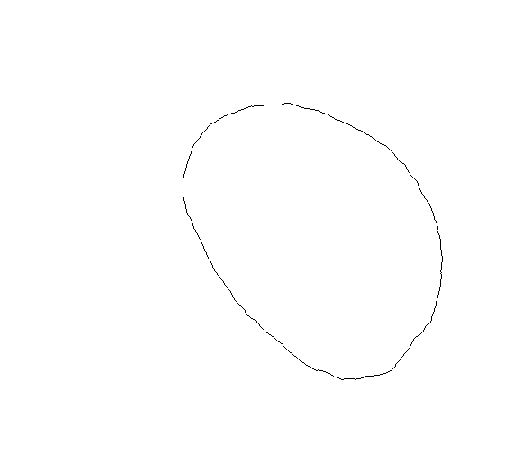

In [5]:
from cellorganizer.tools import slml2img, imshow
import matplotlib.pyplot as plt
def jupyter_imshow(imgpath):
    dpi  = 80
    img = plt.imread(imgpath)
    try:
        height, width, depth = img.shape
    except:
        height, width = img.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = (width / float(dpi)), (height / float(dpi))
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    # Hide spines, ticks, etc.
    ax.axis('off')
    ax.imshow(img, cmap=plt.cm.binary)
    plt.show()

## Options block 
options = {}
options['numberOfSynthesizedImages'] = 1
options['targetDirectory'] = 'pwd'
options['compression '] = 'lzw'
options['model.pca.pca_synthesis_method'] = 'reconstruction'
options['model.pca.imageSize'] = [1024, 1024]
options['prefix'] = 'img'
options['debug'] = False
options['verbose'] = True
options['display'] = False
options['model.name'] = 'PCA_Synth_Im'


## Synthesize image and display it
slml2img({model_name}, options)
if (os.path.exists('img/cell1/cell1.tif')):
    jupyter_imshow('img/cell1/cell1.tif')
#     display(Markdown("## <center> Synthesis Done! Go look at your image </center>"))

## Display the Shape Space from the Generated Model 

## <center> Shape Space Plot </center>

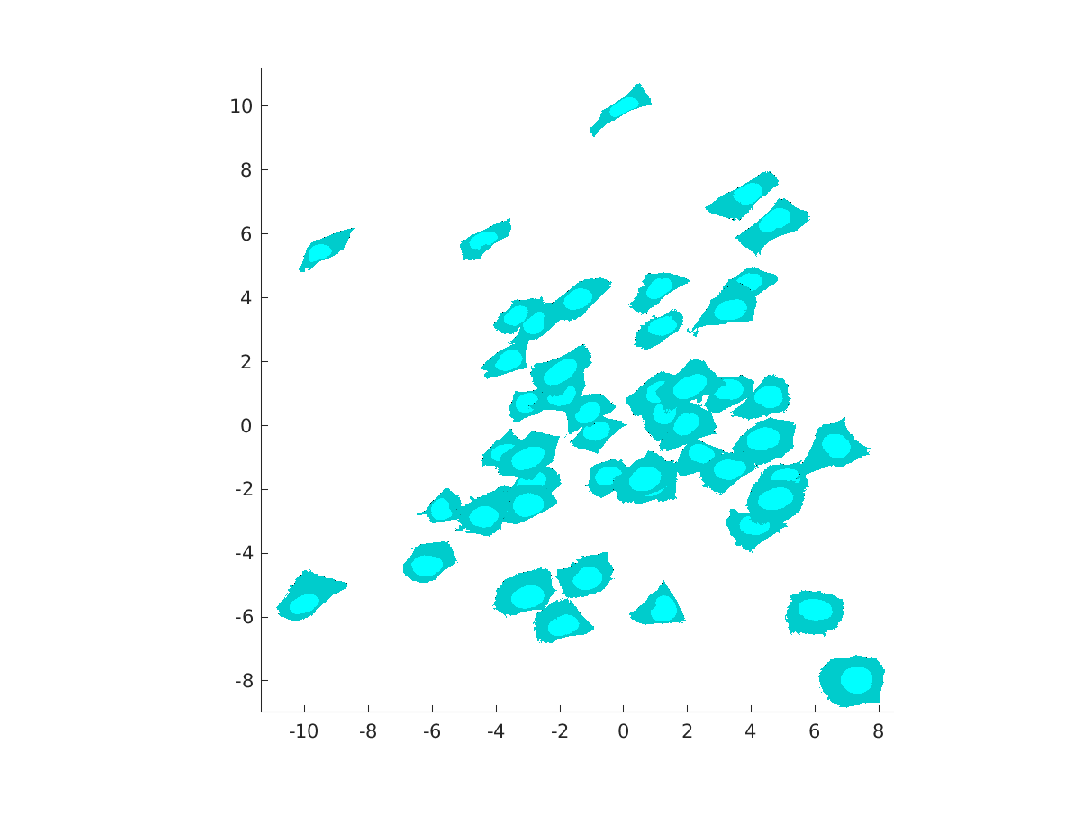

In [4]:
from cellorganizer.tools import slml2info, imshow
def jupyter_imshow(imgpath):
    dpi  = 80
    img = plt.imread(imgpath)
    try:
        height, width, depth = img.shape
    except:
        height, width = img.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = (width / float(dpi)), (height / float(dpi))
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    # Hide spines, ticks, etc.
    ax.axis('off')
    ax.imshow(img, cmap=plt.cm.binary)
    plt.show()

slml2info({model_name},{})
if os.path.exists('report/show_shape_space.png'):
    display(Markdown("## <center> Shape Space Plot </center>"))
    jupyter_imshow('report/show_shape_space.png')